In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import anndata as ad

In [2]:
adata = scv.read("adata_postpro.h5ad", cache = True)

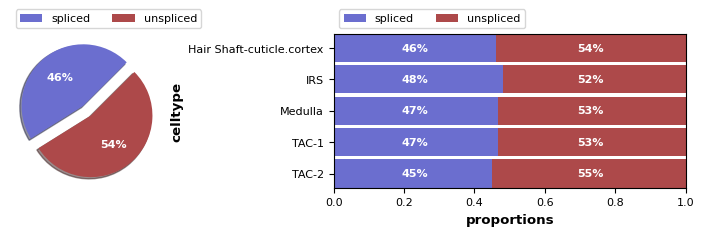

In [3]:
scv.pl.proportions(adata, groupby = "celltype", layers = ["spliced", "unspliced"])

In [4]:
sc.tl.leiden(adata)

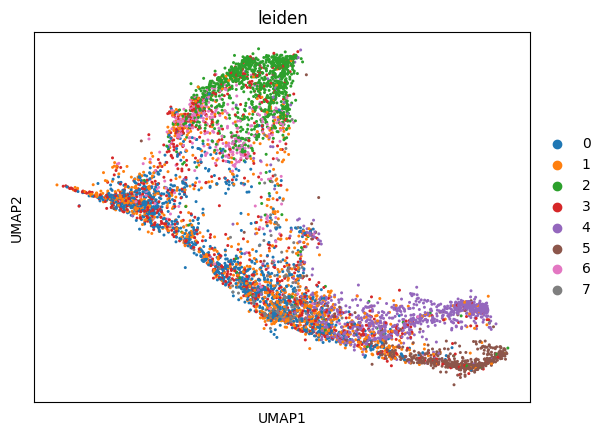

In [5]:
sc.pl.umap(adata, color = "leiden")

In [6]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '0')[0]

In [7]:
sc.tl.dpt(adata)

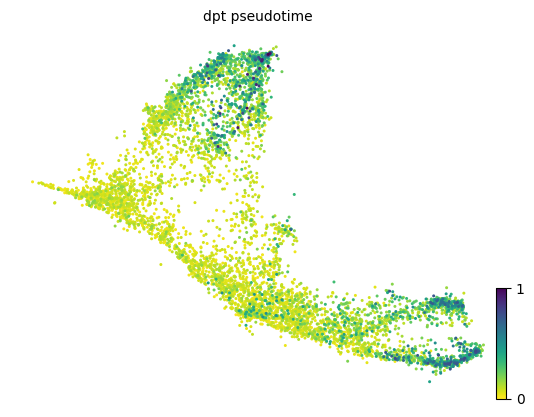

In [8]:
scv.pl.scatter(adata, basis = "umap", color = "dpt_pseudotime")

In [9]:
adata

AnnData object with n_obs × n_vars = 6436 × 962
    obs: 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'mean', 'std'
    uns: 'celltype_colors', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [10]:
adata.write_h5ad("data/JuloVelo_pre.h5ad")